In [1]:
import json
import time
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import quandl
from config import api_key
import csv
import os

# Master Data - CSV

In [2]:
master_data_path = os.path.join("..", "..", "data", "project_one_data", "master_data_cleaned_2.csv")
master_data_df = pd.read_csv(master_data_path)
master_data_df.head()

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
0,2016,Apr,2016-4,4/30/2016,4/28/2016,Z2BR,ZHVI 2-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",384884.0,30566.0,3.5,3.88,3.66
1,2016,Apr,2016-4,4/30/2016,4/28/2016,Z4BR,ZHVI 4-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",881951.0,30566.0,3.5,3.88,3.66
2,2016,Apr,2016-4,4/30/2016,4/28/2016,Z5BR,ZHVI 5+ Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",1287769.0,30566.0,3.5,3.88,3.66
3,2016,Apr,2016-4,4/30/2016,4/28/2016,ZATT,ZHVI All Homes- Top Tier Time Series ($),753871,metro,"Breckenridge, CO; CO",842653.0,30566.0,3.5,3.88,3.66
4,2016,Apr,2016-4,4/30/2016,4/28/2016,Z1BR,ZHVI 1-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",243688.0,30566.0,3.5,3.88,3.66


In [3]:
# Convert Year-Month to Datetime(ns) -- Shared by Binet Alagic
master_data_df["Year-Month"] = master_data_df["Year-Month"].apply(pd.to_datetime)
master_data_df["Year-Month"] = pd.to_datetime(master_data_df["Year-Month"], format="%Y%B")

In [4]:
master_data_cleaned = master_data_df.drop(columns={"Date Zillow", "Date Interest"})

In [5]:
master_data_cleaned = master_data_cleaned.dropna(how="any")

In [6]:
master_data_cleaned.head()

,Year,Month,Year-Month,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
0,2016,Apr,2016-04-01,Z2BR,ZHVI 2-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",384884.0,30566.0,3.5,3.88,3.66
1,2016,Apr,2016-04-01,Z4BR,ZHVI 4-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",881951.0,30566.0,3.5,3.88,3.66
2,2016,Apr,2016-04-01,Z5BR,ZHVI 5+ Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",1287769.0,30566.0,3.5,3.88,3.66
3,2016,Apr,2016-04-01,ZATT,ZHVI All Homes- Top Tier Time Series ($),753871,metro,"Breckenridge, CO; CO",842653.0,30566.0,3.5,3.88,3.66
4,2016,Apr,2016-04-01,Z1BR,ZHVI 1-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",243688.0,30566.0,3.5,3.88,3.66


# SSAM - Median Prices, All Homes

In [7]:
# Look at SSAM - All Homes Monthly
ssam_df = master_data_cleaned[master_data_df["Indicator ID"] == "SSAM"]

C:\Users\coled\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [8]:
ssam_df

,Year,Month,Year-Month,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
417,2016,Apr,2016-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",246388.0,689481.0,3.5,3.88,3.66
582,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.75,3.61
583,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.75,3.57
584,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.88,3.58
585,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.88,3.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66095,2020,Jul,2020-07-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",380467.0,332367.0,7.4,3.00,2.99
66576,2020,Aug,2020-08-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",382967.0,332367.0,6.7,3.00,2.88
66577,2020,Aug,2020-08-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",382967.0,332367.0,6.7,3.00,2.96
66578,2020,Aug,2020-08-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",382967.0,332367.0,6.7,2.88,2.99


In [20]:
freddie_rates = ssam_df.groupby("Year-Month")["Freddie Mac Rate"].mean()
wells_rates = ssam_df.groupby("Year-Month")["Wells Fargo Rate"].mean()

rates_df = pd.DataFrame({"Freddie Mac Rates": freddie_rates, "Wells Fargo Rates": wells_rates})
rates_df.head()

KeyError: 'Column not found: Freddie Mac Rate'

In [10]:
ssam_df = ssam_df.drop(columns={"Wells Fargo Rate", "Freddie Mac Rate"})

In [11]:
ssam_combined_df = pd.merge(ssam_df, rates_df, on="Year-Month" )

In [21]:
ssam_combined_df.head()

,Year,Month,Year-Month,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Freddie Mac Rates,Wells Fargo Rates
0,2016,Apr,2016-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",246388.0,689481.0,3.5,3.66,3.880
1,2016,Apr,2016-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",340150.0,697744.0,3.5,3.66,3.880
2,2016,Apr,2016-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",272475.0,294867.0,3.5,3.66,3.880
3,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.60,3.815
7,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",350150.0,697744.0,3.4,3.60,3.815


In [13]:
ssam_combined_df = ssam_combined_df.drop_duplicates(subset=["Year-Month", "Region Name", "Value"])

In [14]:
ssam_combined_df = ssam_combined_df.sort_values("Year-Month")

In [15]:
ssam_combined_df

,Year,Month,Year-Month,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Freddie Mac Rates,Wells Fargo Rates
0,2016,Apr,2016-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",246388.0,689481.0,3.5,3.660,3.880
1,2016,Apr,2016-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",340150.0,697744.0,3.5,3.660,3.880
2,2016,Apr,2016-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",272475.0,294867.0,3.5,3.660,3.880
3,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.600,3.815
7,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",350150.0,697744.0,3.4,3.600,3.815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,2020,Jul,2020-07-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",360352.0,739968.0,7.4,3.016,2.976
655,2020,Jul,2020-07-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",380467.0,332367.0,7.4,3.016,2.976
664,2020,Aug,2020-08-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",455657.0,738598.0,6.7,2.935,2.940
660,2020,Aug,2020-08-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",368333.0,739968.0,6.7,2.935,2.940


## Analysis DF

In [23]:
unemployment_rate = round(ssam_combined_df.groupby("Year-Month")["Unemployment Rate"].first(), 2)
freddie_mac_rate = round(ssam_combined_df.groupby("Year-Month")["Freddie Mac Rates"].first(), 2)
wells_rates = round(ssam_combined_df.groupby("Year-Month")["Wells Fargo Rates"].first(), 2)
median_sale_price = round(ssam_combined_df.groupby("Year-Month")["Value"].mean(), 2)

In [54]:
analysis_df = pd.DataFrame({"Unemployment Rate": unemployment_rate, 
                        "Freddie Mac Rate": freddie_mac_rate, 
                        "Wells Fargo Rate": wells_rates, 
                        "Median Sale Price": median_sale_price})

In [55]:
analysis_df.head()

,Unemployment Rate,Freddie Mac Rate,Wells Fargo Rate,Median Sale Price
Year-Month,,,,
2016-04-01,3.5,3.66,3.88,286337.67
2016-05-01,3.4,3.60,3.82,292826.33
2016-06-01,3.4,3.57,3.73,297963.33
2016-07-01,3.3,3.44,3.63,301830.00
2016-08-01,3.3,3.43,3.63,304584.00


In [56]:
analysis_unemp = analysis_df.iloc[:, 0]
analysis_fmr = analysis_df.iloc[:, 1]
analysis_wf = analysis_df.iloc[:, 2]
analysis_msp = analysis_df.iloc[:, 3]

### Correlations

In [57]:
# Unemployment & FMR
all_correlation = st.pearsonr(analysis_unemp,analysis_fmr)
print(f"Correlation between Unemployment Rate and Freddie Mac Rates: {all_correlation[0]}.")

# Unemployment & WF
all_correlation = st.pearsonr(analysis_unemp,analysis_wf)
print(f"Correlation between Unemployment Rate and Wells Fargo Rates: {all_correlation[0]}.")

# Unemployment & MSP
all_correlation = st.pearsonr(analysis_unemp,analysis_msp)
print(f"Correlation between Unemployment Rate and Median Sale Price: {all_correlation[0]}.")

# all_unemp_val_cor = ssam_df_single[["Unemployment Rate", "Value"]]
# all_unemp_val_cor.plot("Unemployment Rate", "Value", kind="scatter")
# plt.title("Unemployment and Median Sale Price - All Homes")
# plt.show()

Correlation between Unemployment Rate and Freddie Mac Rates: -0.4806703785731651.
Correlation between Unemployment Rate and Wells Fargo Rates: -0.5575768500634352.
Correlation between Unemployment Rate and Median Sale Price: 0.4756632334532904.


### Scatter Plots

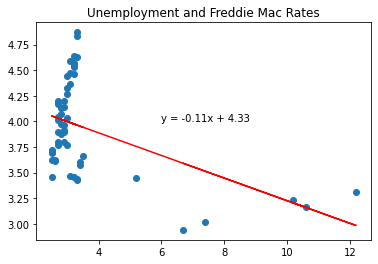

In [85]:
# Formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(analysis_unemp, analysis_fmr)
fmr_regress_values = analysis_unemp * slope + intercept

# Line Equation
fmr_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(analysis_unemp, analysis_fmr)
plt.plot(analysis_unemp, fmr_regress_values, "r-")
plt.title("Unemployment and Freddie Mac Rates")
plt.annotate(fmr_line_eq, (6, 4))

# Line Equation
fmr_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

Text(6, 4, 'y = -0.13x + 4.5')

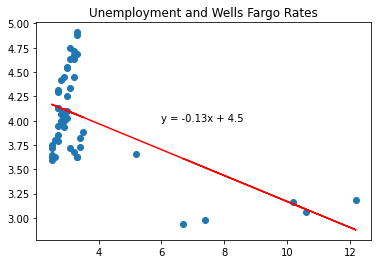

In [86]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(analysis_unemp, analysis_wf)
wf_regress_values = analysis_unemp * slope + intercept

# Line Equation
wf_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(analysis_unemp, analysis_wf)
plt.plot(analysis_unemp, wf_regress_values, "r-")
plt.title("Unemployment and Wells Fargo Rates")
plt.annotate(wf_line_eq, (6, 4))

Text(6, 340000, 'y = 6770.85x + 318946.67')

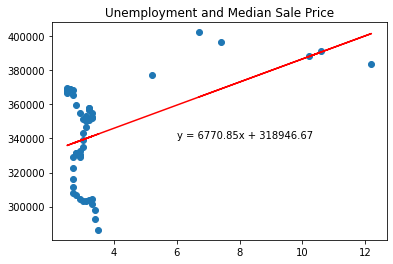

In [87]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(analysis_unemp, analysis_msp)
msp_regress_values = analysis_unemp * slope + intercept

# Line Equation
msp_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(analysis_unemp, analysis_msp)
plt.plot(analysis_unemp, msp_regress_values, "r-")
plt.title("Unemployment and Median Sale Price")
plt.annotate(msp_line_eq, (6, 340000))

### Line Charts - Over Time

Text(0.5, 1.0, 'Unemployment: 2016-2020')

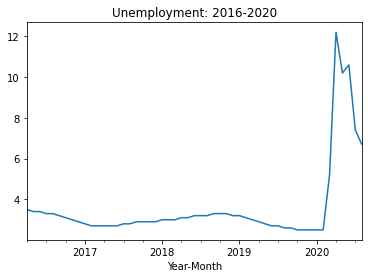

In [88]:
analysis_df["Unemployment Rate"].plot()
plt.title("Unemployment: 2016-2020")

Text(0.5, 1.0, 'Median Sale Price: 2016-2020')

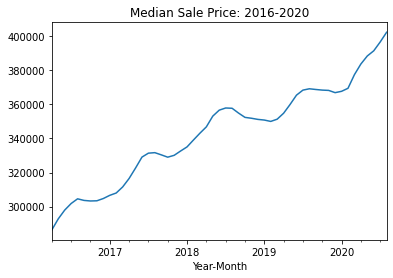

In [89]:
analysis_df["Median Sale Price"].plot()
plt.title("Median Sale Price: 2016-2020")

Text(0.5, 1.0, 'Freddie Mac Rate: 2016-2020')

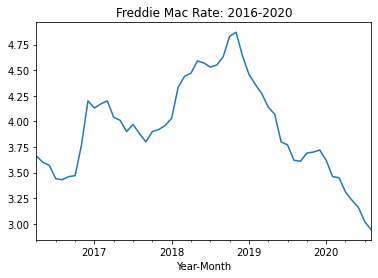

In [90]:
analysis_df["Freddie Mac Rate"].plot()
plt.title("Freddie Mac Rate: 2016-2020")

Text(0.5, 1.0, 'Wells Fargo Rate: 2016-2020')

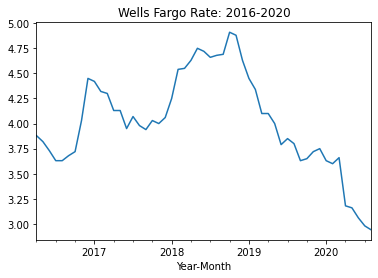

In [91]:
analysis_df["Wells Fargo Rate"].plot()
plt.title("Wells Fargo Rate: 2016-2020")

### Boxplots: Regions

Text(0.5, 1.0, '')

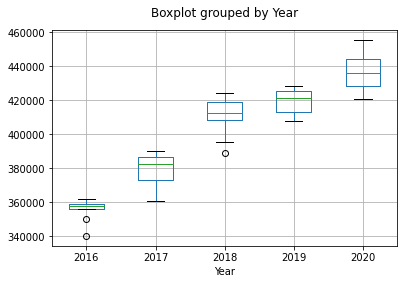

In [92]:
denver_ssam = ssam_df[ssam_df["Region Name"].str.contains("Denver")].groupby("Year-Month").first()
denver_ssam.boxplot(by="Year", column="Value").set_title("")

In [ ]:
ssam_df_single.head()

In [ ]:
all_unemp_x = ssam_df_single["Unemployment Rate"]
all_value_y = ssam_df_single["Value"]

all_correlation = st.pearsonr(all_unemp_x,all_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {all_correlation[0]}.")

all_unemp_val_cor = ssam_df_single[["Unemployment Rate", "Value"]]
all_unemp_val_cor.plot("Unemployment Rate", "Value", kind="scatter")
plt.title("Unemployment and Median Sale Price - All Homes")
plt.show()

In [ ]:
all_ssam_box_value = ssam_df_single.boxplot(by="Region Name", column="Value").set_title("")

In [ ]:
test = ssam_df_single.groupby("Year")["Value"]

In [ ]:
test.head()

In [ ]:
# all_ssam_box_unemp = ssam_df_single.boxplot(by="Region Name", column="Unemployment Rate").set_title("")

In [ ]:
all_ssam_box_value_year = ssam_df_single.boxplot(by="Year", column="Value").set_title("")

In [ ]:
all_ssam_box_unemp_year = ssam_df_single.boxplot(by="Year", column="Unemployment Rate").set_title("")

### Findings - All Regions SSAMs

Median Sale Price is at an all-time high from 2016 to 2020, even when employment rate is at a high from 2016 to 2020. 

## SSAMs Variables by Region Name

In [ ]:
# Denver SSAM

denver_ssam = ssam_df[ssam_df["Region Name"].str.contains("Denver")].groupby("Year-Month").first()

In [ ]:
# Colorado Springs SSAM
co_springs_ssam = ssam_df[ssam_df["Region Name"].str.contains("Colorado Springs")].groupby("Year-Month").first()

In [ ]:
# Greeley SSAM
greeley_ssam = ssam_df[ssam_df["Region Name"].str.contains("Greeley")].groupby("Year-Month").first()

## SSAM Graphs / Correlations

#### Denver, CO

In [ ]:
denver_ssam.head()

In [ ]:
# Set x,y for correlation and scatter
den_unemp_x = denver_ssam["Unemployment Rate"]
den_value_y = denver_ssam["Value"]

# Calc correlation
denver_correlation = st.pearsonr(den_unemp_x,den_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {denver_correlation[0]}.")

# Plot
unemp_value_df = denver_ssam[["Unemployment Rate", "Value"]]
unemp_value_df.plot("Unemployment Rate", "Value", kind="scatter")
plt.title("Denver (2016-2020) \n Unemployment and Median Sale Price - All Homes")
plt.show()

#### Denver, SSAM Pre-COVID

In [ ]:
# Pre-COVID

denver_ssam_pre19 = ssam_df[(ssam_df["Region Name"].str.contains("Denver")) & (ssam_df["Year-Month"] < "2020-03-01")].groupby("Year-Month").first()

In [ ]:
# Set x,y for correlation and scatter
pre19_den_unemp_x = denver_ssam_pre19["Unemployment Rate"]
pre19_den_value_y = denver_ssam_pre19["Value"]

# Calc correlation
pre19_denver_correlation = st.pearsonr(pre19_den_unemp_x,pre19_den_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {pre19_denver_correlation[0]}.")

# Formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(pre19_den_unemp_x, pre19_den_value_y)
den_regress_values = pre19_den_unemp_x * slope + intercept

# Plot
plt.scatter(pre19_den_unemp_x, pre19_den_value_y)
plt.plot(pre19_den_unemp_x, den_regress_values, "r-")


# Line Equation
# greeley_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Design Plot
# plt.annotate(greeley_line_eq,(6, 280000),fontsize=15,color="red")
plt.title("Denver - Pre COVID \n Unemploment % vs. Median Sale Price")
plt.xlabel("Unemployment %")
plt.ylabel('Median Sale Price')

# Show
plt.tight_layout()
plt.savefig("images/pre-covid_denver_ssam_unemp.jpeg")

#### Denver, SSAM During COVID

In [ ]:
denver_ssam_dur19 = ssam_df[(ssam_df["Region Name"].str.contains("Denver")) & (ssam_df["Year-Month"] >= "2020-03-01")].groupby("Year-Month").first()

In [ ]:
# Set x,y for correlation and scatter
dur19_den_unemp_x = denver_ssam_dur19["Unemployment Rate"]
dur19_den_value_y = denver_ssam_dur19["Value"]

# Calc correlation
dur19_denver_correlation = st.pearsonr(dur19_den_unemp_x,dur19_den_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {dur19_denver_correlation[0]}.")

# Plot
denver_ssam_dur19 = denver_ssam_dur19[["Unemployment Rate", "Value"]]
den_sam_scatter = denver_ssam_dur19.plot("Unemployment Rate", "Value", kind="scatter")
plt.title("Denver During Covid \n Unemployment and Median Sale Price - All Homes")
plt.tight_layout()
plt.savefig("images/dur-covid_denver_ssam_unemp.jpeg")

### Findings: Unemployment and Median Sale Price - Denver

There was weak negative correlation between unemployment rate and median sale price pre-COVID. However, during COVID-19, there is no correlation between unemployment rate and median sale price. 

In [ ]:
den_ssam_box = denver_ssam.boxplot(by="Year", column="Value").set_title("")
plt.ylabel("Denver Median Sale Price")
plt.show()

In [ ]:
den_unemp_box = denver_ssam.boxplot(by="Year", column="Unemployment Rate").set_title("")
plt.ylabel("Denver Unemployment Rate")
plt.show()